First, import the historical data of **Silver Prices** from 2020 to 2023 using Yahoo Finance.

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
# Silver Prices
ticker_symbol="SI=F"
start_date="2020-01-01"
end_date="2024-01-01"

df=yf.download(ticker_symbol,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,17.966000,17.990000,17.966000,17.966000,17.966000,2
2020-01-03,18.110001,18.110001,17.965000,18.068001,18.068001,83
2020-01-06,18.025000,18.105000,18.025000,18.097000,18.097000,3
2020-01-07,18.014999,18.344999,18.014999,18.316000,18.316000,33
2020-01-08,18.400000,18.504999,18.070000,18.087999,18.087999,31


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,22.745953,22.913692,22.566426,22.732278,22.732278,1506.219682
std,3.205626,3.223612,3.182028,3.203664,3.203664,9202.326533
min,12.070000,12.205000,11.735000,11.735000,11.735000,0.000000
25%,21.005000,21.247499,20.913750,21.051001,21.051001,11.250000
50%,23.347500,23.500000,23.208000,23.345500,23.345500,47.000000
75%,24.950500,25.157500,24.779251,24.922750,24.922750,153.750000
max,29.530001,30.160000,28.313999,29.398001,29.398001,131415.000000


## Time Series

In [7]:
# Making 'Date' into a column, instead of keeping it as index in order to create required visuals.
df.reset_index(inplace=True)

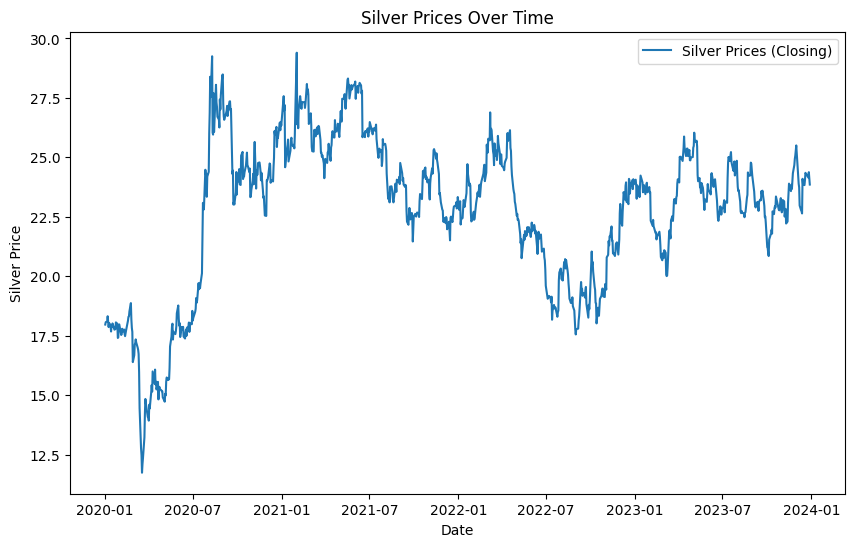

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Silver Prices (Closing)')
plt.title('Silver Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Silver Price')
plt.legend()
plt.show()

This shows the trend of the closing prices over time.

## Candlestick Chart

In [9]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='Silver Price Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Silver Price',
                  xaxis_rangeslider_visible=False)

On hovering over the graph, you can see the open, close, high and low prices of each day.
Green indicates a bullish candlestick which means the opening price is lower than the closing price and there is an increase at the end of the day. Conversely, red indicates a bearish candlestick which means the closing price is lower than the opening price and there is a decrese at the end of the day.
Buyers benefit from the green candlesticks and sellers benefit from the red candlesticks.

## Moving Averages

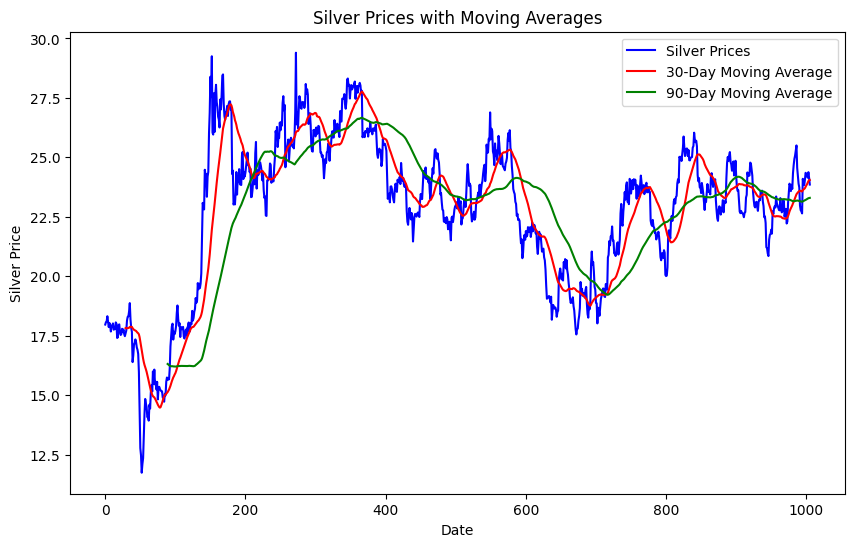

In [10]:
plt.figure(figsize=(10, 6))
df['Close'].plot(label='Silver Prices', color='blue')
df['Close'].rolling(window=30).mean().plot(label='30-Day Moving Average', color='red')
df['Close'].rolling(window=90).mean().plot(label='90-Day Moving Average', color='green')
plt.title('Silver Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Silver Price')
plt.legend()



Moving averages helps to smooth out data find trends over a specified time period; in our case, we took the 30-day and 90-day time periods. It takes the average over the specified time period and creates  new averages that gets updated along the way, giving us the red and green lines shown here.



## Volume Analysis

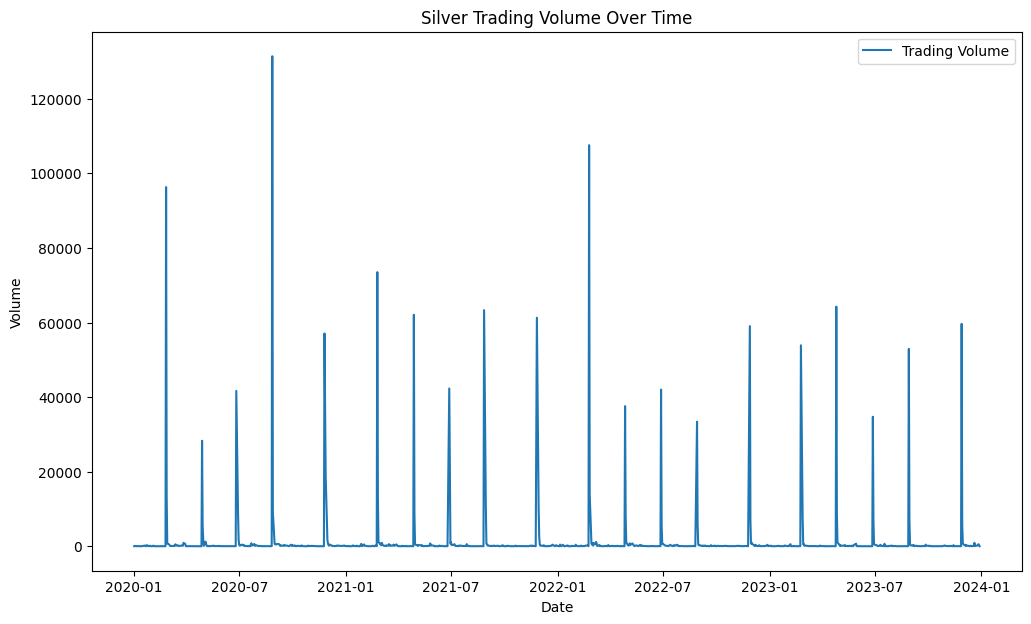

In [12]:
plt.figure(figsize=(12,7))
plt.plot(df['Date'], df['Volume'], label='Trading Volume')
plt.title('Silver Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()


Volume represents the total number of shares or contracts traded for silver from 2020 till the end of 2023. High volume indicates a high amount of trading acitivity and a low volume indicates low trading activity. Higher volumes tend to be linked to high liquidity and high volatility, so there is more trading opportunities during these times but also more risk involved.Volume analysis can also reveal seasonal trends.

## Histogram

Text(0, 0.5, 'Frequency')

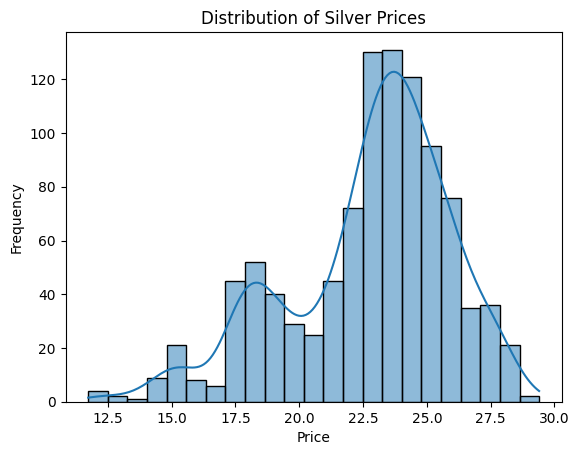

In [15]:
import seaborn as sns

sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Silver Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')


This graph shows that the price of silver between 2020-2023 was often in the 22$ to 26$ range.

## Box Plots

Text(0, 0.5, 'Closing Price')

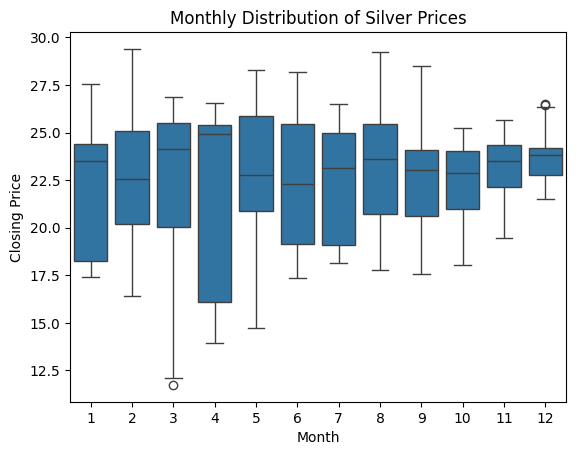

In [20]:
df['Month'] = df['Date'].dt.month
sns.boxplot(x='Month', y='Close', data=df)
plt.title('Monthly Distribution of Silver Prices')
plt.xlabel('Month')
plt.ylabel('Closing Price')


Above shows the distribution of prices over each month.

Text(0, 0.5, 'Closing Price')

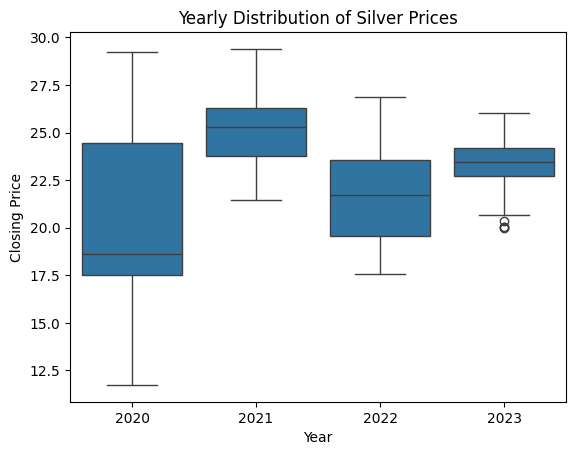

In [21]:
df['Year'] = df['Date'].dt.year
sns.boxplot(x='Year', y='Close', data=df)
plt.title('Yearly Distribution of Silver Prices')
plt.xlabel('Year')
plt.ylabel('Closing Price')

This plot shows the distribution of silveer prices over the years 2020-2023 and it looks like 2020 was a really good year to be trading in silver.